# Data Wrangling Accident

- Author: Bharath Kumar Devakumar
- Work For: AlphAtom
- Date: 18-08-2017
- Description: Data preprocessing and cleaning
- Data: Accident statistics from 2012 - 2017
- Source: https://www.data.vic.gov.au/data/dataset/crash-stats-data-extract

In [1]:
#defining packages used in this notebook
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np
from pandas.tseries.offsets import *
# import pyodbc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy.stats import linregress,spearmanr
import re
import xlrd
import seaborn as sns


In [2]:
os.chdir('/Users/Bharath/Documents/MDS/Semester 4 /IE/Project/Data')
postdf = pd.read_csv('Australian_Post_Codes_Lat_Lon.csv')
nmefunc = lambda x: x.title().strip()
postdf['suburb'] = postdf.suburb.dropna().apply(nmefunc)
postdf.head()

,postcode,suburb,state,dc,type,lat,lon
0,3000,Melbourne,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.814563,144.970267
1,3001,Melbourne,VIC,CITY MAIL PROCESSING CENTRE,Post Office Boxes,-38.365017,144.765920
2,3002,East Melbourne,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.816640,144.987811
3,3003,West Melbourne,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.806255,144.941123
4,3004,Melbourne,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.837324,144.976335


In [3]:
os.chdir('/Users/Bharath/Documents/MDS/Semester 4 /IE/Project/Data/ACCIDENT')
accdf1 = pd.read_csv('ACCIDENT.csv',)
accdf1.head()
accdf2 = pd.read_csv('Crashes_Last_Five_Years.csv',)
accdf2.head()
nodedf = pd.read_csv('NODE.csv',)
nodedf.head()

,ACCIDENT_NO,NODE_ID,NODE_TYPE,AMG_X,AMG_Y,LGA_NAME,Lga Name All,Region Name,Deg Urban Name,Lat,Long,Postcode_No
0,T20060000010,43078,I,2519154.655,2390265.155,DANDENONG,DANDENONG,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.98862,145.21805,3175
1,T20060000018,29720,N,2524272.738,2389996.754,CASEY,CASEY,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.99092,145.27632,3804
2,T20060000022,203074,N,2487321.878,2345019.968,MORNINGTON PENINSULA,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,Country,-38.39632,144.85489,3939
3,T20060000023,55462,I,2512734.120,2390214.959,DANDENONG,"KINGSTON,DANDENONG",METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.98918,145.14496,3173
4,T20060000026,202988,N,2488777.655,2347611.908,MORNINGTON PENINSULA,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-38.37299,144.87159,3940


In [4]:
accdf_t = pd.merge(accdf1, accdf2, left_on = 'ACCIDENT_NO', right_on = 'ACCIDENT_NO', how = 'inner')
accdf_t = pd.merge(accdf_t, nodedf, left_on = 'ACCIDENT_NO', right_on = 'ACCIDENT_NO', how = 'inner')


In [5]:
len(accdf_t)

76518

In [6]:
accdf_t.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE_x,Accident Type Desc,DAY_OF_WEEK_x,Day Week Description,DCA_CODE_x,DCA Description,DIRECTORY,...,NODE_TYPE_y,AMG_X,AMG_Y,LGA_NAME_y,Lga Name All,Region Name,Deg Urban Name,Lat,Long,Postcode_No
0,T20120000009,01/01/12,02.25.00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,VCS,...,N,2563629.135,2362697.914,BAW BAW,BAW BAW,EASTERN REGION,Country,-38.23498,145.72671,3981
1,T20120000012,01/01/12,02.00.00,1,Collision with vehicle,1,Sunday,110,CROSS TRAFFIC(INTERSECTIONS ONLY),MEL,...,I,2514194.742,2399718.938,MONASH,MONASH,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.90354,145.16140,3170
2,T20120000013,01/01/12,03.35.00,1,Collision with vehicle,1,Sunday,160,VEHICLE COLLIDES WITH VEHICLE PARKED ON LEFT O...,MEL,...,I,2508689.410,2396130.003,KINGSTON,KINGSTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.93594,145.09885,3169
3,T20120000018,01/01/12,05.15.00,4,Collision with a fixed object,1,Sunday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHIC...,VCS,...,I,2227360.371,2804744.001,MILDURA,MILDURA,WESTERN REGION,Country,-34.21587,142.04388,3505
4,T20120000021,01/01/12,07.30.00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,...,N,2480591.134,2347977.920,MORNINGTON PENINSULA,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-38.36956,144.77793,3942


In [7]:
accdf_t.columns

Index([u'ACCIDENT_NO', u'ACCIDENTDATE', u'ACCIDENTTIME', u'ACCIDENT_TYPE_x',
       u'Accident Type Desc', u'DAY_OF_WEEK_x', u'Day Week Description',
       u'DCA_CODE_x', u'DCA Description', u'DIRECTORY',
       ...
       u'NODE_TYPE_y', u'AMG_X', u'AMG_Y', u'LGA_NAME_y', u'Lga Name All',
       u'Region Name', u'Deg Urban Name', u'Lat', u'Long', u'Postcode_No'],
      dtype='object', length=103)

In [8]:
accdf = accdf_t[['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'SEVERITY_x','SEVERITY_y', 'LONGITUDE','LATITUDE', 'Postcode_No']]

In [9]:
len(accdf[accdf['SEVERITY_x']==1])

1321

### Accident Severity
- Fatal accident - 1
- Serious injury accident - 2
- Other injury accident - 3
- Non injury accident - 4

In [10]:
accdf.SEVERITY_x.describe()

count    76518.000000
mean         2.667006
std          0.506648
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: SEVERITY_x, dtype: float64

In [11]:
accdf2[accdf2.duplicated(keep='last')|accdf2.duplicated()]



,﻿X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME


In [12]:
accdf.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,SEVERITY_x,SEVERITY_y,LONGITUDE,LATITUDE,Postcode_No
0,T20120000009,01/01/12,02.25.00,3,Other injury accident,145.72671,-38.23498,3981
1,T20120000012,01/01/12,02.00.00,3,Other injury accident,145.16140,-37.90354,3170
2,T20120000013,01/01/12,03.35.00,3,Other injury accident,145.09885,-37.93594,3169
3,T20120000018,01/01/12,05.15.00,3,Other injury accident,142.04388,-34.21587,3505
4,T20120000021,01/01/12,07.30.00,3,Other injury accident,144.77793,-38.36956,3942


In [13]:
acccountdf = pd.DataFrame(accdf.groupby("Postcode_No")['ACCIDENT_NO'].count())
acccountdf.reset_index(level=0, inplace=True)
acccountdf.columns = ['postcode', 'accident_count']
acccountdf.columns

Index([u'postcode', u'accident_count'], dtype='object')

### Does Normalisation required? 
 -  Workout after iteration-2

In [135]:
os.chdir('/Users/Bharath/Documents/MDS/Semester 4 /IE/Project/Data/')
subdf = pd.read_csv('Suburb_Data_Full_v9.csv',)
subdf.head()

,Unnamed: 0,community_name,region,map_reference,grid_reference,location,population_density,travel_time_gpo,distance_to_gpo,lga,...,emergency department presentations,emergency department presentations_percent,postcode,suburb,state,dc,type,lat,lon,suburb_id
0,0,Abbotsford,Northern and Western Metropolitan,4.0,C3,3km ENE of Melbourne,3082.440714,6.114670,4.264157,Yarra (C),...,885.444791,63.414814,3067,Abbotsford,VIC,FITZROY DC,Delivery Area,-37.801781,144.998752,0
1,1,Aberfeldie,Northern and Western Metropolitan,4.0,B2,8km NW of Melbourne,2426.665450,13.410363,9.881527,Moonee Valley (C),...,487.056490,56.290032,3040,Aberfeldie,VIC,MOONEE PONDS DC,Delivery Area,-37.756690,144.896259,1
2,2,Airport West,Northern and Western Metropolitan,4.0,A1,12km NW of Melbourne,1972.445069,14.529965,15.217034,Moonee Valley (C),...,935.248290,56.454248,3042,Airport West,VIC,NIDDRIE DC,Delivery Area,-37.711698,144.887037,2
3,3,Albanvale,Northern and Western Metropolitan,3.0,D1,19km WNW of Melbourne,2879.831482,24.349505,26.176087,Brimbank (C),...,744.175853,60.273026,3021,Albanvale,VIC,ST ALBANS DC,Delivery Area,-37.745934,144.770027,3
4,4,Albert Park,Southern Metropolitan,1.0,B1,3km S of Melbourne,1850.280150,6.382196,4.248504,Port Phillip (C),...,757.322366,56.815347,3206,Albert Park,VIC,SOUTH MELBOURNE DC,Delivery Area,-37.840705,144.955710,4


In [136]:
subpopdf = subdf[['suburb_id','population_density','area', 'postcode','suburb']]

In [137]:
accmergedf = pd.merge(acccountdf, subpopdf, left_on = 'postcode', right_on = 'postcode', how = 'inner') 

In [138]:
accmergedf

,postcode,accident_count,suburb_id,population_density,area,suburb
0,3000,1295,201,5283.936587,6.231528,Melbourne
1,3002,244,116,3651.081310,1.399038,East Melbourne
2,3003,358,326,627.275215,6.592003,West Melbourne
3,3004,430,203,5283.936587,6.231528,Melbourne
4,3006,378,284,10635.359416,1.262205,Southbank
5,3008,419,104,2212.143874,3.001613,Docklands
6,3012,353,180,5156.029894,0.724782,Kingsville
7,3012,353,195,2627.316051,3.157214,Maidstone
8,3013,172,332,2580.662484,5.619875,Yarraville
9,3015,202,233,2566.403547,4.930246,Newport


### Correlation Analysis Plot

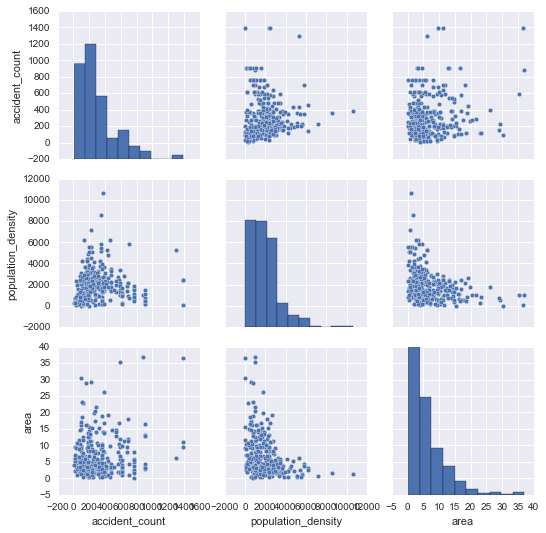

In [57]:
sns.set()
%matplotlib inline
# Pair plot function helps to visualise the correlation between numreic attributes
plotdf = accmergedf[['accident_count','population_density','area']]
sns.pairplot(plotdf.dropna())

In [139]:
accmergedf.dropna().corr(method='pearson', min_periods=1)

,postcode,accident_count,suburb_id,population_density,area
postcode,1.000000,0.039529,0.029186,-0.450031,0.183142
accident_count,0.039529,1.000000,-0.011928,0.032255,0.150848
suburb_id,0.029186,-0.011928,1.000000,-0.075296,0.035266
population_density,-0.450031,0.032255,-0.075296,1.000000,-0.322347
area,0.183142,0.150848,0.035266,-0.322347,1.000000


### Observation
- There is no correlation betwee accident count and population density and area

In [140]:
accmergedf.accident_count.describe()

count     330.000000
mean      303.087879
std       238.605832
min        10.000000
25%       137.750000
50%       235.000000
75%       383.000000
max      1392.000000
Name: accident_count, dtype: float64

In [141]:
accmergedf[accmergedf['postcode']==3163]

,postcode,accident_count,suburb_id,population_density,area,suburb
173,3163,228,72,4544.446521,3.804424,Carnegie
174,3163,228,137,5588.766554,0.893578,Glen Huntly


In [142]:
904*0.142857

129.142728

In [143]:
accmergedf

,postcode,accident_count,suburb_id,population_density,area,suburb
0,3000,1295,201,5283.936587,6.231528,Melbourne
1,3002,244,116,3651.081310,1.399038,East Melbourne
2,3003,358,326,627.275215,6.592003,West Melbourne
3,3004,430,203,5283.936587,6.231528,Melbourne
4,3006,378,284,10635.359416,1.262205,Southbank
5,3008,419,104,2212.143874,3.001613,Docklands
6,3012,353,180,5156.029894,0.724782,Kingsville
7,3012,353,195,2627.316051,3.157214,Maidstone
8,3013,172,332,2580.662484,5.619875,Yarraville
9,3015,202,233,2566.403547,4.930246,Newport


In [144]:
accmergedf['accident_norm_count'] = accmergedf['accident_count']
# Normalise the accident count based on the suburb count under each postcode
accmergedf['accident_norm_count'] /= accmergedf.groupby(['postcode'])['accident_count'].transform('count')

In [150]:
accmergedf

,postcode,accident_count,suburb_id,population_density,area,suburb,accident_norm_count,accident_rate
0,3000,1295,201,5283.936587,6.231528,Melbourne,1295.000000,Very High
1,3002,244,116,3651.081310,1.399038,East Melbourne,244.000000,Very High
2,3003,358,326,627.275215,6.592003,West Melbourne,358.000000,Very High
3,3004,430,203,5283.936587,6.231528,Melbourne,430.000000,Very High
4,3006,378,284,10635.359416,1.262205,Southbank,378.000000,Very High
5,3008,419,104,2212.143874,3.001613,Docklands,419.000000,Very High
6,3012,353,180,5156.029894,0.724782,Kingsville,176.500000,High
7,3012,353,195,2627.316051,3.157214,Maidstone,176.500000,High
8,3013,172,332,2580.662484,5.619875,Yarraville,172.000000,High
9,3015,202,233,2566.403547,4.930246,Newport,67.333333,Low


In [151]:
accmergedf.accident_norm_count.describe()

count     330.000000
mean      154.200000
std       133.509371
min        10.000000
25%        76.400000
50%       113.666667
75%       191.500000
max      1295.000000
Name: accident_norm_count, dtype: float64

In [152]:
def Generic_label_func(x,y):
    if x<y[4]:
        return 'Low'
    elif x<y[5]:
        return 'Moderate'
    elif x<y[6]:
        return 'High'
    else:
        return 'Very High'

In [153]:
# Label the accident rate based on each quartile value 
accmergedf['accident_rate'] = accmergedf.apply(lambda row: Generic_label_func(row['accident_norm_count'], accmergedf.accident_norm_count.describe()), axis=1)

In [154]:
accmergedf

,postcode,accident_count,suburb_id,population_density,area,suburb,accident_norm_count,accident_rate
0,3000,1295,201,5283.936587,6.231528,Melbourne,1295.000000,Very High
1,3002,244,116,3651.081310,1.399038,East Melbourne,244.000000,Very High
2,3003,358,326,627.275215,6.592003,West Melbourne,358.000000,Very High
3,3004,430,203,5283.936587,6.231528,Melbourne,430.000000,Very High
4,3006,378,284,10635.359416,1.262205,Southbank,378.000000,Very High
5,3008,419,104,2212.143874,3.001613,Docklands,419.000000,Very High
6,3012,353,180,5156.029894,0.724782,Kingsville,176.500000,High
7,3012,353,195,2627.316051,3.157214,Maidstone,176.500000,High
8,3013,172,332,2580.662484,5.619875,Yarraville,172.000000,High
9,3015,202,233,2566.403547,4.930246,Newport,67.333333,Low


### Write the accident rating to csv file

In [155]:
accmergedf.to_csv('Rating/accidentrate.csv', sep=',')